<a href="https://colab.research.google.com/github/FelixRicIvan/AI/blob/main/keras_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,466 (91.66 KB)

 Trainable params: 23,466 (91.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.6359 - loss: 11.4235
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.9516 - loss: 0.2751
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - accuracy: 0.9750 - loss: 0.1020
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.9838 - loss: 0.0598
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.9880 - loss: 0.0413
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 146ms/step - accuracy: 0.9899 - loss: 0.0338
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step - accuracy: 0.9925 - loss: 0.0225
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.9933 - loss: 0.0196
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.9952 - loss: 0.0148
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.9953 - loss: 0.0136


In [ ]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9744 - loss: 0.1258
0.9789000153541565


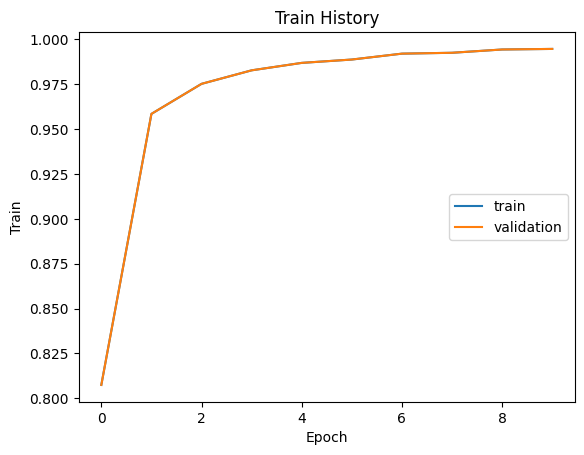

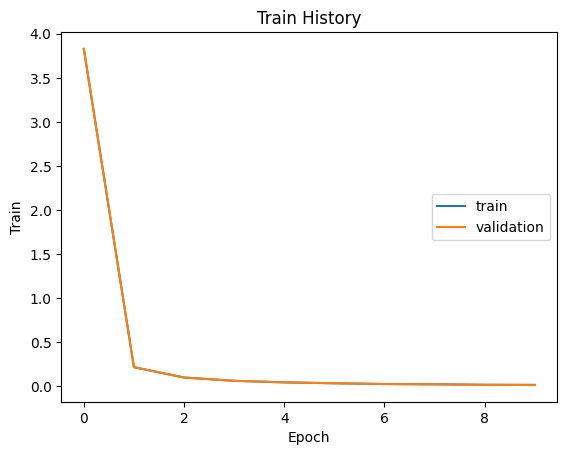

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,965,1,3,0,0,0,3,2,3,3
1,0,1115,5,1,4,2,1,2,5,0
2,0,3,1018,0,2,0,1,6,2,0
3,1,0,7,988,0,8,0,1,4,1
4,0,1,2,0,966,0,4,1,0,8
5,2,1,0,8,0,864,3,0,5,9
6,7,1,1,0,2,2,939,0,6,0
7,0,3,11,0,1,0,0,1006,1,6
8,6,1,3,0,4,2,3,1,948,6


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])